Printed copies of *Elements of Data Science* are available now, with a **full color interior**, from [Lulu.com](https://www.lulu.com/shop/allen-downey/elements-of-data-science/paperback/product-9dyrwn.html).

# Times and Places

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/v1/02_times.ipynb).

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://raw.githubusercontent.com/AllenDowney/ElementsOfDataScience/v1/utils.py')

import utils

The previous chapter introduces variables and two kinds of values: integers and floating-point numbers.
This chapter presents these additional types:

* Strings, which represent text.

* Time stamps, which represent dates and times.

* And several ways to represent and display geographical locations.

Not every data science project uses all of these types, but many projects use at least one.

## Strings

A **string** is a sequence of letters, numbers, and punctuation marks.
In Python you can create a string by enclosing text between single or double quotation marks.

In [2]:
'Elements'

'Elements'

In [3]:
"of"

'of'

And you can assign string values to variables.

In [4]:
first = 'Data'
last = "Science"

Some arithmetic operators work with strings, but they might not do what you expect.  For example, the `+` operator **concatenates** two strings -- that is, it creates a new string that contains the first string followed by the second string:

In [5]:
first + last

'DataScience'

If you want to put a space between the words, you can use a string that contains a space:

In [6]:
first + ' ' + last

'Data Science'

Strings are used to store text data like names, addresses, titles, etc.
When you read data from a file, you might see values that look like numbers, but they are actually strings, like this:

In [7]:
not_actually_a_number = '123'

If you try to do math with these strings, you *might* get an error.

In [8]:
%%expect TypeError

not_actually_a_number + 1

TypeError: can only concatenate str (not "int") to str

But you might not -- instead, you might get a surprising result.
For example:

In [9]:
not_actually_a_number * 3

'123123123'

If you multiply a string by an integer, Python repeats the string the given number of times.

If you have a string that contains only digits, you can convert it to an integer using the `int` function:

In [10]:
int('123')

123

Or you can convert it to a floating-point number using `float`:

In [11]:
float('12.3')

12.3

But if the string contains a decimal point, you can't convert it to an `int`.

In [12]:
%%expect ValueError

int('12.3')

ValueError: invalid literal for int() with base 10: '12.3'

Going in the other direction, you can convert any type of value to a string using `str`:

In [13]:
str(123)

'123'

In [14]:
str(12.3)

'12.3'

**Exercise**: When personal names are stored in a database, they might be stored in variables representing one or more given names, family names, and maybe additional middle names.  For example, a list of early statisticians might include:

In [15]:
given = 'William'
middle = 'Sealy'
family = 'Gosset'

But names are often displayed different ways in different contexts.  For example, the first time you mention someone in a book, you might give all three names, like "William Sealy Gosset". But in the index, you might put the family name first, like "Gosset, William Sealy".
Write Python expressions that use the variables `given`, `middle`, and `family` to display Gosset's name in these two formats. 

In [16]:
# Solution

given + ' ' + middle + ' ' + family

'William Sealy Gosset'

In [17]:
# Solution

family + ', ' + given + ' ' + middle

'Gosset, William Sealy'

## Representing Dates and Times

When you read data from a file, you might find that dates and times are represented with strings.

In [18]:
not_really_a_date = 'June 4, 1989'

To check the type of a value, we can use the `type` function.

In [19]:
type(not_really_a_date)

str

The result indicates that the value of `not_really_a_date` is a string.

We get the same result with `not_really_a_time`, below:

In [20]:
not_really_a_time = '6:30:00'
type(not_really_a_time)

str

Strings that represent dates and times are readable for people, but they are not useful for computation.
Fortunately, Python provides libraries for working with date and time data -- the one we'll use is called Pandas.
As always, we have to import a library before we use it.
It is conventional to import Pandas with the abbreviated name `pd`:

In [21]:
import pandas as pd

Pandas provides a type called `Timestamp`, which represents a date and time.
If we have a string that contains a time or date, we can convert it to a `Timestamp` like this:

In [22]:
pd.Timestamp('6:30:00')

Timestamp('2024-04-22 06:30:00')

Or we can do the same thing using the variable defined above.

In [23]:
pd.Timestamp(not_really_a_time)

Timestamp('2024-04-22 06:30:00')

In this example, the string specifies a time but no date, so Pandas fills in today's date.
A `Timestamp` is a value, so you can assign it to a variable.

In [24]:
date_of_birth = pd.Timestamp('May 11, 1967')
date_of_birth

Timestamp('1967-05-11 00:00:00')

If the string specifies a date but no time, Pandas fills in midnight as the default time.

If you assign the `Timestamp` to a variable, you can use the variable name to get the year, month, and day, like this:

In [25]:
date_of_birth.year, date_of_birth.month, date_of_birth.day

(1967, 5, 11)

You can also get the name of the month and the day of the week.

In [26]:
date_of_birth.day_name(), date_of_birth.month_name()

('Thursday', 'May')

`Timestamp` provides a function called `now` that returns the current date and time.

In [27]:
now = pd.Timestamp.now()
now

Timestamp('2024-04-22 17:35:20.306774')

**Exercise:** Use the value of `now` to display the name of the current month and day of the week.

In [28]:
# Solution

now.day_name(), now.month_name()

('Monday', 'April')

## Timedelta

`Timestamp` values support some arithmetic operations.
For example, you can compute the difference between two `Timestamp` objects:

In [29]:
age = now - date_of_birth
age

Timedelta('20801 days 17:35:20.306774')

The result is a `Timedelta` that represents the current age of someone born on `date_of_birth`.
The `Timedelta` contains `components` that store the number of days, hours, etc. between the two `Timestamp` values.

The `wrap` function splits the output onto multiple lines so it doesn't run off the page.

In [30]:
from utils import wrap

wrap(age.components)

Components(days=20801, hours=17, minutes=35, seconds=20,
    milliseconds=306, microseconds=774, nanoseconds=0)


You can get one of the components like this:

In [31]:
age.days

20801

It might seem strange to measure a large interval in days rather than years.
The problem is that the duration of a year is not clearly defined.
Most years are `365` days, but some are `366`.
The average calendar year is `365.24` days, which is a very good approximation of a solar year, but even that's not exact.

Expressing a duration in days is clearly defined -- but it is not easy to interpret. 
To express `age` in years, we can divide by `365.24`:

In [32]:
age.days / 365.24

56.951593472785014

But people usually report their ages in integer years.  We can use the Numpy `floor` function to round down:

In [33]:
import numpy as np

np.floor(age.days / 365.24)

56.0

Or the `ceil` function (which stands for "ceiling") to round up:

In [34]:
np.ceil(age.days / 365.24)

57.0

We can also compare `Timestamp` values to see which comes first.
For example, let's see if a person with a given birthdate has already had a birthday this year.
Here's a new `Timestamp` with the year from `now` and the month and day from `date_of_birth`.

In [35]:
bday_this_year = pd.Timestamp(now.year, 
                              date_of_birth.month, 
                              date_of_birth.day)
bday_this_year

Timestamp('2024-05-11 00:00:00')

The result represents the person's birthday this year.
Now we can use the "greater than" operator, `>`, to check whether `now` is later than the birthday:

In [36]:
now > bday_this_year

False

The result is either `True` or `False`.
These values belong to a type called `bool`.
The name comes from "Boolean algebra", which is a branch of algebra where all values are either true or false. 

In [37]:
type(True)

bool

In [38]:
type(False)

bool

**Exercise:** Any two people with different birthdays have a "Double Day" when one is twice as old as the other.
Suppose you are given two `Timestamp` values, `d1` and `d2`, that represent birthdays for two people.  Use `Timestamp` arithmetic to compute their double day.
With the following dates, the result should be December 19, 2009.

In [39]:
d1 = pd.Timestamp('2003-07-12')
d2 = pd.Timestamp('2006-09-30')

In [40]:
# Solution

d2 + (d2 - d1)

Timestamp('2009-12-19 00:00:00')

## Representing Location

In addition to times and dates, we might also want to represent locations, especially if we are working with geographical data.
There are many ways to represent locations, but the most common, at least for global data, is latitude and longitude.
When stored in a string, latitude and longitude are expressed in degrees with compass directions N, S, E, and W.
For example, this string represents the location of Boston, Massachusetts, USA:

In [41]:
lat_lon_string = '42.3601° N, 71.0589° W'

But for purposes of computation it is more common to represent longitude and latitude with two floating-point numbers, with

* Positive latitude for locations in the northern hemisphere, negative latitude for the southern hemisphere, and 

* Positive longitude locations in the eastern hemisphere and negative longitude for the western hemisphere.

The location of the origin and the orientation of positive and negative are arbitrary choices that were made for historical reasons.
Here's how we might represent the location of Boston with two variables.

In [42]:
lat = 42.3601
lon = -71.0589

It is also possible to combine two numbers into a composite value and assign it to a single variable:

In [43]:
boston = lat, lon
boston

(42.3601, -71.0589)

The type of this variable is `tuple`, which is a mathematical term for a value that contains a sequence of elements.
Math people pronounce it "tuh' ple", but computational people usually say "too' ple".
Either is fine.

In [44]:
type(boston)

tuple

If you have a tuple with two elements, you can assign them to two variables, like this:

In [45]:
y, x = boston
y

42.3601

In [46]:
x

-71.0589

Notice that I assigned latitude to `y` and longitude to `x`, because a `y` coordinate usually goes up and down like latitude, and an `x` coordinate usually goes side-to-side like longitude.

**Exercise:** Find the latitude and longitude of the place you were born or someplace you think of as your "home town".
Make a tuple of floating-point numbers that represents that location.

In [47]:
# Solution

sharon = 42.112778, -71.183889

## Calculating Distance

If you are given two tuples that represent locations, you can compute the approximate distance between them, along the surface of the globe, using the haversine function:

$\mathrm{haversine}(\theta)=\sin^2(\theta/2)$

Where $\theta$ is an angle in radians.
We can compute this function in Python like this:

In [48]:
import numpy as np

θ = 1
np.sin(θ/2)**2

0.22984884706593015

You can use Greek letters in variable names, but there is currently no way to type them in Jupyter/Colab, so I usually copy them from a web page and paste them in.
To avoid the inconvenience, it is common to write out letter names, like this:

In [49]:
theta = 1
np.sin(theta/2)**2

0.22984884706593015

Remember that the operator for exponentiation is `**`.
In some other languages it's `^`, which is also an operator in Python, but it performs another operation altogether.

**Exercise:** Try out the previous expression, replacing `**` with `^`, and see what error message you get.  Remember this message in case you see it in the future!

In [50]:
# Solution

# np.sin(theta/2)^2

# TypeError: ufunc 'bitwise_xor' not supported for the input types, 
# and the inputs could not be safely coerced to any supported types 
# according to the casting rule ''safe''

## Defining Functions

If we are planning to use an expression like `np.sin(theta/2)**2` more than a few times, we can define a new function that computes it, like this:

In [51]:
def haversine(theta):
    """Compute the haversine function of theta."""
    return np.sin(theta/2)**2

On the first line, `def` indicates that we are defining a function.
The second line is a triple-quoted string, which is a **comment**: it describes what the function does, but has no effect when the program runs.
On the third line, `return` indicates the result of the function.

When you run the previous cell, it creates a new variable called `haversine`.  You can display its value like this:

In [52]:
haversine

<function __main__.haversine(theta)>

And you can display its type like this:

In [53]:
type(haversine)

function

So `haversine` is a variable that refers to a function.
To run the function and compute a result, we have to **call** the function and provide a value for `theta`:

In [54]:
haversine(1)

0.22984884706593015

When you define a function, you create a new variable.  But the function doesn't actually run until you call it.

## Haversine Distance

Now we can use `haversine` as part of a function that computes haversine distances.
I won't explain this function in as much detail, but if you read through it, you can get a sense of how it works.

In [55]:
def haversine_distance(coord1, coord2):
    """Haversine distance between two locations.
    
    coord1: lat-lon as tuple of float 
    coord2: lat-lon as tuple of float
    
    returns: distance in km
    """
    R = 6372.8  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = np.radians(lat1), np.radians(lat2) 
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = haversine(dphi) + np.cos(phi1) * np.cos(phi2) * haversine(dlambda)
    
    distance = 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return distance

When we call this function, we provide two tuples; each is a latitude-longitude pair.
We already have a tuple that represents the location of Boston.
Now here's a tuple that represents the location of London, England, UK:

In [56]:
london = 51.5074, -0.1278

And here's the haversine distance between Boston and London.

In [57]:
haversine_distance(boston, london)

5265.656325981015

The actual geographic distance is slightly different because Earth is not a perfect sphere.  But the error of this estimate is less than 1%.

**Exercise:** Use `haversine_distance` to compute the distance between Boston and your home town from the previous exercise. If possible, use an online map to check the result.

In [58]:
# Solution

haversine_distance(boston, sharon)

29.37125127957227

## Geopandas

Python provides libraries for working with geographical data.  One of the most popular is Geopandas, which is based on Pandas and another library called Shapely. 
Shapely provides `Point` and `LineString` values, which we'll use to represent geographic locations and lines between them.

In [59]:
from shapely.geometry import Point, LineString

We can use the tuples we defined in the previous section to create Shapely `Point` values, but we have to reverse the order of the coordinates, providing them in `x`-`y` order rather than `lat`-`lon` order, because that's the order the `Point` function expects.

In [60]:
lat, lon = boston
p1 = Point(lon, lat)

In [61]:
lat, lon = london
p2 = Point(lon, lat)

If we display a `Point` value, we get a graphical representation, but not a very useful one.

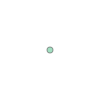

In [62]:
p1

We can use the points we just defined to create a `LineString`:

In [63]:
line = LineString([p1, p2])

If we display the result, we get another not very useful graphical representation.

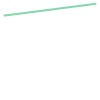

In [64]:
line

The following cell installs Geopandas, if necessary.

In [65]:
try:
    import geopandas
except ImportError:
    !pip install geopandas
    !pip install geodatasets

Now we can use Geopandas to show these points and lines on a map.
The following cells load a map of the world and plot it.

In [66]:
from geodatasets import fetch

fetch('naturalearth.land')

In [67]:
from geodatasets import get_path

path = get_path('naturalearth.land')

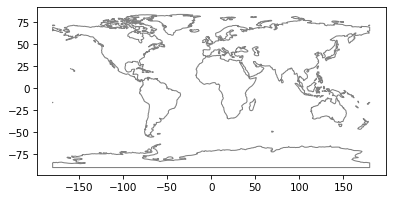

In [68]:
import geopandas as gpd
world = gpd.read_file(path)
world.plot(color='white', edgecolor='gray');

By default, Geopandas uses an equirectangular projection, which provides a misleading picture of relative land areas.
Other projections are available that show land areas accurately, but they can be misleading in other ways.
You can't make a map without making visualization decisions.

Now let's put dots on the map for Boston and London.
First, we have to put the `Point` values and the `LineString` into a `GeoSeries`.

In [69]:
t = [p1, p2, line]
series = gpd.GeoSeries(t)

Here's a first attempt to plot the maps and the lines together:

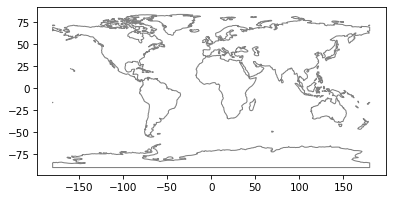

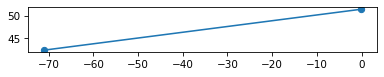

In [70]:
# plot the map
world.plot(color='white', edgecolor='gray')

# plot Boston, London, and the line
series.plot();

The two plots are on different axes, which is not what we want in this case.

To get the points and the map on the same axes, we have to use a function from Matplotlib, which is a visualization library we will use extensively.  We'll import it like this.

In [71]:
import matplotlib.pyplot as plt

From Matplotlib, we'll use the function `gca`, which stands for "get current axes".
With the result we can tell `plot` to put the points and lines on the current axes, rather than create a new one.

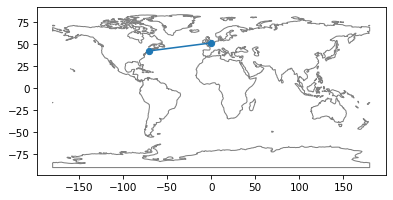

In [72]:
ax = plt.gca()
world.plot(color='white', edgecolor='gray', ax=ax)
series.plot(ax=ax);

Finally, `plt` provides a function called `figure` we can use to set the figure size.

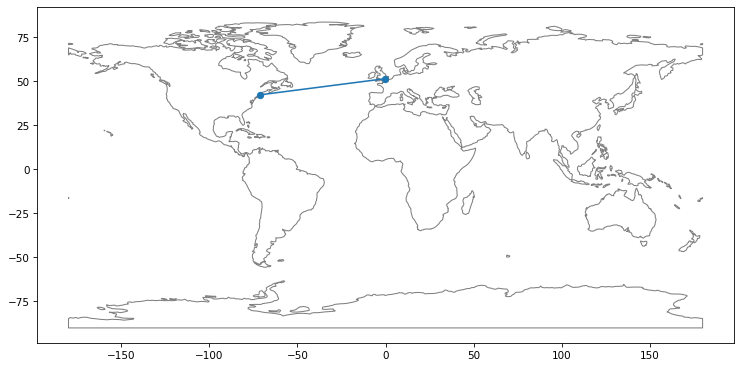

In [73]:
plt.figure(figsize=(12, 12))
ax = plt.gca()

# plot the map
world.plot(color='white', edgecolor='gray', ax=ax)

# plot Boston, London, and the line
series.plot(ax=ax);

**Exercise:** Modify the code in this section to plot a point that shows the home town you chose in a previous exercise and a line from there to Boston.

Then go to [this online survey](https://forms.gle/2LDcqxJmcWY3Q3X47) and answer the questions there.
When you are done, [run this notebook](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/v1/geo_example.ipynb) to see the results.

## Summary

This chapter presents three new data types: strings to represent letters and words, `Timestamp` objects to represent dates and times, and tuples to represent latitude, longitude pairs.
It also introduces Geopandas, a library for working with location data.

In the next chapter we'll see two ways to represent a collection of data, a Python list and a Numpy array.

*Elements of Data Science*

Copyright 2021 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)